In [23]:
import jax
import numpy as np

print(jax.__version__)

0.4.31


In [31]:
print(jax.devices())
print(jax.device_count())
print(jax.local_devices())
print(jax.default_device())
print(jax.devices(backend='gpu'))
print(jax.devices(backend='cuda'))

[CudaDevice(id=0)]
1
[CudaDevice(id=0)]
[CudaDevice(id=0)]
[CudaDevice(id=0)]


In [3]:
ar1 = [x for x in range(10)]
print(f"ar1: {ar1}")
npr1 = np.array(ar1)
print(f"npr1: {npr1}")

ar1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
npr1: [0 1 2 3 4 5 6 7 8 9]


In [14]:
print(f"ar1 * 2: {ar1 * 2}")
print(f"npr1 * 2: {npr1 * 2}")

ar1 * 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
npr1 * 2: [ 0  2  4  6  8 10 12 14 16 18]


In [37]:
ar2 = [x for x in range(10) if x % 2 == 0]
print(f"ar2: {ar2}")
npr2 = np.array(ar2)
print(f"npr2: {npr2}")
print(f"ar1 + ar2: {ar1 + ar2}")
# print(f"npr1 + npr2: {npr1 + npr2}") # ValueError: operands could not be broadcast together with shapes (10,) (5,)
npr3 = np.array([x for x in range(10) if x % 2 == 1])
print(f"npr3: {npr3}")
print(f"npr1.shape: {npr1.shape}, npr2.shape: {npr2.shape}, npr3.shape: {npr3.shape}")
print(f"npr2 + npr3: {npr2 + npr3}")
print(f"ar2 + npr3: {ar2 + npr3}")
print(f"npr3 + ar2: {npr3 + ar2}")

ar2: [0, 2, 4, 6, 8]
npr2: [0 2 4 6 8]
ar1 + ar2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 4, 6, 8]
npr3: [1 3 5 7 9]
npr1.shape: (10,), npr2.shape: (5,), npr3.shape: (5,)
npr2 + npr3: [ 1  5  9 13 17]
ar2 + npr3: [ 1  5  9 13 17]
npr3 + ar2: [ 1  5  9 13 17]


In [39]:
npr = np.array([x for x in range(10) if x % 2 == 0])
print(f"npr: {npr}, npr.shape: {npr.shape}")
npr_row = np.array([npr])
npr_column = npr_row.T
print(f"\nnpr_row: {npr_row} \nnpr_row.shape: {npr_row.shape}")
print(f"\nnpr_column: \n{npr_column} \nnpr_column.shape: {npr_column.shape}\n")
print(npr_row + npr_column)
print()
print(npr_row * npr_column)

npr: [0 2 4 6 8], npr.shape: (5,)

npr_row: [[0 2 4 6 8]] 
npr_row.shape: (1, 5)

npr_column: 
[[0]
 [2]
 [4]
 [6]
 [8]] 
npr_column.shape: (5, 1)

[[ 0  2  4  6  8]
 [ 2  4  6  8 10]
 [ 4  6  8 10 12]
 [ 6  8 10 12 14]
 [ 8 10 12 14 16]]

[[ 0  0  0  0  0]
 [ 0  4  8 12 16]
 [ 0  8 16 24 32]
 [ 0 12 24 36 48]
 [ 0 16 32 48 64]]


In [6]:
npa1 = np.array([x for x in range(10)])
print(f"npa1: {npa1}")
print(f"npa1[2:6]: {npa1[2:6]}")

npa1: [0 1 2 3 4 5 6 7 8 9]
npa1[2:6]: [2 3 4 5]


In [59]:
print(f"\nnpr_row: {npr_row}")
print(f"\nnpr_column: \n{npr_column}\n")
print(f"npr_row[0][1:3]: \n{npr_row[0][1:3]}")
print(f"\nnpr_column[1:4]: \n{npr_column[1:4]}")
print(f"\nnpr_column[0:3]: \n{npr_column[0:3]}")


npr_row: [[0 2 4 6 8]]

npr_column: 
[[0]
 [2]
 [4]
 [6]
 [8]]

npr_row[0][1:3]: 
[2 4]

npr_column[1:4]: 
[[2]
 [4]
 [6]]

npr_column[0:3]: 
[[0]
 [2]
 [4]]


In [8]:
npa2 = np.arange(12)
print(f"npa2: {npa2}")
print(f"npa2.reshape(3,4): \n{npa2.reshape(3,4)}")

npa2: [ 0  1  2  3  4  5  6  7  8  9 10 11]
npa2.reshape(3,4): 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
import jax.numpy as jnp
arr = jnp.array([1, 2, 3])
print(arr)
# element-wise operations
sqrs = arr * arr
print(sqrs)
sqrs2 = jnp.square(arr)
print(sqrs2)

[1 2 3]
[1 4 9]
[1 4 9]


### JAX functions and Automatic Differentiation

In [60]:
def square(x):
  """ Square a number """
  return x ** 2

n = 5.
# Calculate the square of n with autodiff!
grad_square = jax.grad(square) # Get the gradient function
square_value = square(n)
square_grad = grad_square(n) # Calculate the gradient at x = 5.0 - must be float or array for autodiff
print(f"Square of 5: {square_value}, Gradient at 5: {square_grad}")

Square of 5: 25.0, Gradient at 5: 10.0


In [61]:
# https://www.youtube.com/watch?v=2uk_pvndOMw

from prettytable import PrettyTable

def f(x):
  return x**4 + 3*x**3 - 36*x**2 - 68*x + 240

n_array = [-7., -6.5, -6., -5.118, -0.9]

grad_f = jax.grad(f)
t = PrettyTable(["x", "f(x)", "f'(x)"])
for n in n_array:
  t.add_row([n, f(n), grad_f(n)])
print(t)

+--------+--------------------+---------------+
|   x    |        f(x)        |     f'(x)     |
+--------+--------------------+---------------+
|  -7.0  |       324.0        |     -495.0    |
|  -6.5  |      122.1875      |    -318.25    |
|  -6.0  |        0.0         |     -176.0    |
| -5.118 | -71.01711857822397 | -0.0006713867 |
|  -0.9  |      270.5091      |   1.1739953   |
+--------+--------------------+---------------+


### Vectorized operations, calculations are performed on entire arrays simultaneously 

In [12]:
x = jnp.arange(10) # Array of numbers 0 to 9
y = jnp.ones(10)*2 # array of 10 elements, all set to 2
# vectorized addition
z = x + y
print(x)
print(y)
print(z)

[0 1 2 3 4 5 6 7 8 9]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


## Linear Algebra Operations

In [13]:
# Create matrix
mat1 = np.array([[x for x in range(12) if x % 2 == 0], [y for y in range(12) if y % 2 > 0]])
print(f"mat1: \n{mat1}")
mat2 = mat1.reshape(3,4)
print(f"mat2: \n{mat2}")
print(f"mat2 second row -> mat2[1,:] : \n{mat2[1,:]}")
print(f"mat2 second column -> mat2[:,1] : \n{mat2[:,1]}")
print(f"mat2 element at row 2 and column 3 -> mat2[1,2] : \n{mat2[1,2]}")

mat1: 
[[ 0  2  4  6  8 10]
 [ 1  3  5  7  9 11]]
mat2: 
[[ 0  2  4  6]
 [ 8 10  1  3]
 [ 5  7  9 11]]
mat2 second row -> mat2[1,:] : 
[ 8 10  1  3]
mat2 second column -> mat2[:,1] : 
[ 2 10  7]
mat2 element at row 2 and column 3 -> mat2[1,2] : 
1


In [15]:
npa1 = np.array([x for x in range(10) if x % 2 == 0])
npa2 = np.array([x for x in range(10) if x % 2 > 0])
print(f"npa1: {npa1}, npa2: {npa2}")
print(f"npa1 @ npa2: {npa1 @ npa2}")
print(f"npa1.dot(npa2): {npa1.dot(npa2)}")

npa1: [0 2 4 6 8], npa2: [1 3 5 7 9]
npa1 @ npa2: 140
npa1.dot(npa2): 140


In [72]:
mat1 = np.array([npa1,npa2])
mat2 = np.array([npa1,npa2]).T
print(f"mat1: \n{mat1}\n\nmat2: \n{mat2}")

print(f"\nmat1 @ mat2: \n{mat1 @ mat2}")
print(f"\nmat1.dot(mat2): \n{mat1.dot(mat2)}")

# print(f"\nmat1 @ [1,2,3,4,5]: \n{mat1 @ 3}") #  Error: matmul: Input operand 1 does not have enough dimensions 
                                               # (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1
print(f"\nmat1 * 3: \n{mat1 * 3}")
print(f"\nmat1.dot(3): \n{mat1.dot(3)}")

mat1: 
[[0 2 4 6 8]
 [1 3 5 7 9]]

mat2: 
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

mat1 @ mat2: 
[[120 140]
 [140 165]]

mat1.dot(mat2): 
[[120 140]
 [140 165]]

mat1 * 3: 
[[ 0  6 12 18 24]
 [ 3  9 15 21 27]]

mat1.dot(3): 
[[ 0  6 12 18 24]
 [ 3  9 15 21 27]]


## Data types

In [19]:
ar_float32 = np.array([x for x in range(10) if x % 2 == 0], dtype=np.float32)
ar_int32 = np.array([x for x in range(10) if x % 2 == 0], dtype=np.int32)

print(f"\nar_float32: {ar_float32}")
print(f"ar_float32 data type: {ar_float32.dtype}")
print(f"\nar_int32: {ar_int32}")
print(f"ar_int32 data type: {ar_int32.dtype}")
print(f"\nnp.full(3,4),True: \n{np.full((3,4),True, dtype=np.bool)}")
print(f"\nData type: \n{np.full((3,4),True).dtype}")


ar_float32: [0. 2. 4. 6. 8.]
ar_float32 data type: float32

ar_int32: [0 2 4 6 8]
ar_int32 data type: int32

np.full(3,4),True: 
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]

Data type: 
bool


In [21]:
ar_int32 = np.array([x for x in range(10) if x % 2 == 0])
print(f"ar_int32: {ar_int32}")
ar_float32 = ar_int32.astype(dtype=np.float32)
print(f"ar_float32: {ar_float32}")

ar_int32: [0 2 4 6 8]
ar_float32: [0. 2. 4. 6. 8.]


In [86]:
mdarr = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(f"mdarr: \n{mdarr}")
print(f"\nmdarr.shape: {mdarr.shape}")

mdarr: 
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

mdarr.shape: (2, 2, 3)


In [101]:
print(f"mdarr first dimention -> mdarr[0]: \n{mdarr[0]}")           # mdarr.shape[0] == 2 (0,1)
print(f"mdarr second dimention -> mdarr[1]: \n{mdarr[1]}")          # mdarr.shape[0] == 2 (0,1)
print(f"mdarr first dimention -> mdarr[0,:,:]: \n{mdarr[0,:,:]}")           # mdarr.shape[0] == 2 (0,1)
print(f"mdarr second dimention -> mdarr[1,:,:]: \n{mdarr[1,:,:]}")          # mdarr.shape[0] == 2 (0,1)

print(f"mdarr second dimention -> mdarr[0][1]: \n{mdarr[0][1]}")    # mdarr.shape[1] == 2 (0,1)
print(f"mdarr second dimention -> mdarr[1][0]: \n{mdarr[1][0]}")    # mdarr.shape[1] == 2 (0,1)

print(f"mdarr second dimention -> mdarr[0,1,:]: \n{mdarr[0,1,:]}")    # mdarr.shape[1] == 2 (0,1)
print(f"mdarr second dimention -> mdarr[1,0,:]: \n{mdarr[1,0,:]}")    # mdarr.shape[1] == 2 (0,1)

print(f"mdarr second dimention -> mdarr[1][0][2]: \n{mdarr[1][0][2]}") # mdarr.shape[2] == 3 (0,1,2)
print(f"mdarr second dimention -> mdarr[1,0,2]: \n{mdarr[1,0,2]}") # mdarr.shape[2] == 3 (0,1,2)

mdarr first dimention -> mdarr[0]: 
[[1 2 3]
 [4 5 6]]
mdarr second dimention -> mdarr[1]: 
[[ 7  8  9]
 [10 11 12]]
mdarr first dimention -> mdarr[0,:,:]: 
[[1 2 3]
 [4 5 6]]
mdarr second dimention -> mdarr[1,:,:]: 
[[ 7  8  9]
 [10 11 12]]
mdarr second dimention -> mdarr[0][1]: 
[4 5 6]
mdarr second dimention -> mdarr[1][0]: 
[7 8 9]
mdarr second dimention -> mdarr[0,1,:]: 
[4 5 6]
mdarr second dimention -> mdarr[1,0,:]: 
[7 8 9]
mdarr second dimention -> mdarr[1][0][2]: 
9
mdarr second dimention -> mdarr[1,0,2]: 
9


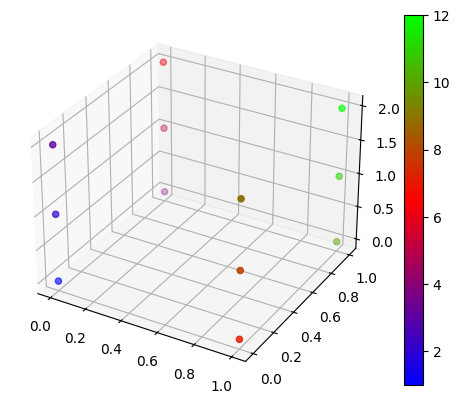

In [93]:
import matplotlib.pyplot as plt

x = np.indices(mdarr.shape)[0]
y = np.indices(mdarr.shape)[1]
z = np.indices(mdarr.shape)[2]
col = mdarr.flatten()

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(projection='3d')
cm = plt.colormaps['brg']
p3d = ax3D.scatter(x, y, z, c=col, cmap=cm)
plt.colorbar(p3d)

plt.show()

In [96]:
print(f"The first 2D slice: \n{mdarr[0,:,:]}") 
print(f"\nTranspose the first 2D slice: \n{mdarr[0,:,:].T}") 

The first 2D slice: 
[[1 2 3]
 [4 5 6]]

Transpose the first 2D slice: 
[[1 4]
 [2 5]
 [3 6]]


In [118]:
"""
Solve system of linear equations.

example from:
https://www.askpython.com/python-modules/numpy/numpy-linalg-solve
"""
print("System of linear equations:\n")
print("------------")
print('x + 2y = 4')
print('3x − 5y = 1')
print("------------\n")
#form the matrices from the equations
A = np.array([[1,2],[3,-5]])
B=np.array([4,1])
#function call nd result calculation
C=np.linalg.solve(A,B)
#display the result
print("Solution:")
s = PrettyTable(["Var","Val"])
s.add_row(["x", C[0]])
s.add_row(["y", C[1]])
print(s)

System of linear equations:

------------
x + 2y = 4
3x − 5y = 1
------------

Solution:
+-----+-----+
| Var | Val |
+-----+-----+
|  x  | 2.0 |
|  y  | 1.0 |
+-----+-----+
